# Example 15.3: First Law for Combustion

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
$\require{mhchem}$
Propane fuel ($\ce{C3H8}$) at $25^\circ\mathrm{C}$ and $1\ \mathrm{atm}$ is mixed steadily with 50 percent excess air at $500^\circ\mathrm{C}$ in an atmospheric pressure combustor.  The combustion products leave at $1500^\circ\mathrm{C}$, and the volumetric flow rate of the air is $1\ \mathrm{m^3/s}$.  Determine the rate of heat transfer for the process.

## Solution

__[Video Explanation](https://iad.scorm.canvaslms.com/courses/sconeID/scone_prod.sha256_6e78faba9f8bb423f2a76824db47b0d141a4e01616142b392eaa9f1db1db4d21/0/Ex15.mp4)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
from kilojoule.tables import Cengel

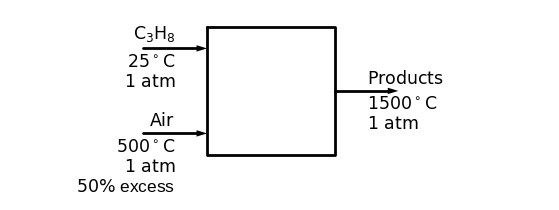

In [4]:
from kilojoule.schemdraw import *
with schemdraw.Drawing() as d:
    d += (chamb := thermo.HX(passes=3,coils=False))
    d += elm.Arrow().at(chamb.W1).left(1.5).reverse().label(r'$\mathrm{C_3H_8}$',halign='right').label(r'$25^\circ\mathrm{C}$'+'\n'+'$1\ \mathrm{atm}$',loc="bottom",halign='right')
    d += elm.Arrow().at(chamb.W3).left(1.5).reverse().label(r'$\mathrm{Air}$',halign='right').label(r'$500^\circ\mathrm{C}$'+'\n'+'$1\ \mathrm{atm}$'+'\n'+'$50\%$ excess',loc="bottom",halign='right')
    d += elm.Arrow().at(chamb.E).right(1.5).label(r'$\mathrm{Products}$',halign='left').label(r'$1500^\circ\mathrm{C}$'+'\n'+'$1\  \mathrm{atm}$',loc="bottom",halign='left')

## Chemical Balance

\begin{equation}
	\ce{ CH4 + $1.5$a_{th}(O2 + $3.76$ N2) -> a CO2 + b H2O(\ell) + $0.5$ a_{th}O2 + c N2 }
\end{equation}

\begin{align}
	\ce{C}:& & % Carbon Balance
    	3&=a &
        &\Rightarrow&
        a&=3\\
	\ce{H}:& & % Hydrogen Balance
    	8&=2b &
        &\Rightarrow&
        b&=4\\
	\ce{O}:& & % Oxygen Balance
    	(1.5)(2)a_{th}&=2a+b+(0.5)(2)a_{th}  &
        &\Rightarrow& 
        a_{th}&=5\\
	\ce{N2}:& & % Nitrogen Balance
    	1.5(3.76)&=c &
        &\Rightarrow&
        d&=28.2\\
\end{align}

\begin{equation}
	\ce{C3H8(g) + $7.5$ (O2 + $3.76$N2) -> 3CO2 + 4 H2O(g) + $2.5$O2 + $28.2$ N2}
\end{equation}

In [5]:
a = 3
b = 4
a_th = 5
c = 28.2

N_fuel = 1
N_air = 1.5*a_th*4.76
N_O2_R = 1.5*a_th
N_CO2 = a
N_H2O = b
N_O2_P = 0.5
N_N2 = c

### Property Tables

In [6]:
A1 = Cengel.Table("A1")
N2 = A18 = Cengel.Table("A18")
O2 = A19 = Cengel.Table("A19")
CO2 = A20 = Cengel.Table("A20")
CO = A21 = Cengel.Table("A21")
H2 = A22 = Cengel.Table("A22")
H2O = A23 = Cengel.Table("A23")
O = A24 = Cengel.Table("A24")
OH = A25 = Cengel.Table("A25")
A26 = Cengel.Table("A26")
A27 = Cengel.Table("A27")
set_latex({f'ho_f_molar_{i}':r'\overline{h}^{\,^\circ}_{f,\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2','CO_2'),
    ('H2O','H_2O'),
    ('N2','N_2'),
    ('O2','O_2'),
    ('C3H8','C_3H_8'),
    )})
set_latex({f'ho_molar_{i}':r'\overline{h}^{\,^\circ}_{\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2','CO_2'),
    ('H2O','H_2O'),
    ('N2','N_2'),
    ('O2','O_2'),
    ('C3H8','C_3H_8'),
    )})
set_latex({f'h_molar_{i}':r'\overline{h}_{\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('N2_R','N_2,R'),
    ('O2_R','O_2,R'),
    ('C3H8_R','C_3H_8,R'),
    )})
set_latex({f'h_molar_{i}':r'\overline{h}_{\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2_P','CO_2,P'),
    ('H2O_P','H_2O,P'),
    ('N2_P','N_2,P'),
    ('O2_P','O_2,P')
    )})

In [7]:
%%showcalc
"Temperatures"
T_0 = Quantity(25,'degC')
T_fuel = Quantity(25,'degC')
T_air = Quantity(500,'degC')
T_products = Quantity(1500,'degC')
"Moles of fuel"
N_fuel = Quantity(1,'kmol')
"Enthalpies of formation at reference state"
ho_f_molar_CO2 = A26.ho_f_molar('CO2')
ho_f_molar_H2O = A26.ho_f_molar('H2O','g')
ho_f_molar_N2 = A26.ho_f_molar('N2')
ho_f_molar_O2 = A26.ho_f_molar('O2')
ho_f_molar_C3H8 = A26.ho_f_molar('C3H8')
"Enthalpies at reference state"
ho_molar_CO2 = CO2.h_molar(T_0)
ho_molar_H2O = H2O.h_molar(T_0)
ho_molar_N2 = N2.h_molar(T_0)
ho_molar_O2 = O2.h_molar(T_0)
"Reactant enthalpies"
h_molar_O2_R = O2.h_molar(T_air)
h_molar_N2_R = N2.h_molar(T_air)
"Product enthalpies"
h_molar_CO2_P = CO2.h_molar(T_products)
h_molar_H2O_P= H2O.h_molar(T_products)
h_molar_O2_P = O2.h_molar(T_products)
h_molar_N2_P = N2.h_molar(T_products)

"First Law"
qbar = N_CO2*(ho_f_molar_CO2 + h_molar_CO2_P - ho_molar_CO2) + N_H2O*(ho_f_molar_H2O + h_molar_H2O_P - ho_molar_H2O) + N_O2_P*(ho_f_molar_O2 + h_molar_O2_P - ho_molar_O2)+ N_N2*(ho_f_molar_O2 + h_molar_N2_P - ho_molar_N2) - N_O2_R*(ho_f_molar_O2 + h_molar_O2_R - ho_molar_O2) - N_N2*(ho_f_molar_N2 + h_molar_N2_R - ho_molar_N2) -1*(ho_f_molar_C3H8)

Temperatures
\begin{align}
  T_{0} &=  25\ \mathrm{°C} 
\end{align}

\begin{align}
  T_{fuel} &=  25\ \mathrm{°C} 
\end{align}

\begin{align}
  T_{air} &=  500\ \mathrm{°C} 
\end{align}

\begin{align}
  T_{products} &=  1500\ \mathrm{°C} 
\end{align}

Moles of fuel
\begin{align}
  N_{fuel} &=  1\ \mathrm{kmol} 
\end{align}

Enthalpies of formation at reference state
\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{CO_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( CO2 \right)  = -3.9352\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{H_2O}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( H2O, g \right)  = -2.4182\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{N_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( N2 \right)  = 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( O2 \right)  = 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{C_3H_8}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( C3H8 \right)  = -1.0385\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

Enthalpies at reference state
\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{CO_2}} &=  \mathrm{ \underset{ CO2 }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ CO2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 9369.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{H_2O}} &=  \mathrm{ \underset{ H2O }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ H2O }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 9908.6\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{N_2}} &=  \mathrm{ \underset{ N2 }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ N2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 8673.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{\mathrm{O_2}} &=  \mathrm{ \underset{ O2 }{ h\_molar } }\left( T_{0} \right)  = \mathrm{ \underset{ O2 }{ h\_molar } }\left( 25\ \mathrm{°C} \right) = 8686.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

Reactant enthalpies
\begin{align}
  \overline{h}_{\mathrm{O_2,R}} &=  \mathrm{ \underset{ O2 }{ h\_molar } }\left( T_{air} \right)  = \mathrm{ \underset{ O2 }{ h\_molar } }\left( 500\ \mathrm{°C} \right) = 2.3619\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}_{\mathrm{N_2,R}} &=  \mathrm{ \underset{ N2 }{ h\_molar } }\left( T_{air} \right)  = \mathrm{ \underset{ N2 }{ h\_molar } }\left( 500\ \mathrm{°C} \right) = 2.2871\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

Product enthalpies
\begin{align}
  \overline{h}_{\mathrm{CO_2,P}} &=  \mathrm{ \underset{ CO2 }{ h\_molar } }\left( T_{products} \right)  = \mathrm{ \underset{ CO2 }{ h\_molar } }\left( 1500\ \mathrm{°C} \right) = 8.7204\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}_{\mathrm{H_2O,P}} &=  \mathrm{ \underset{ H2O }{ h\_molar } }\left( T_{products} \right)  = \mathrm{ \underset{ H2O }{ h\_molar } }\left( 1500\ \mathrm{°C} \right) = 7.1185\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}_{\mathrm{O_2,P}} &=  \mathrm{ \underset{ O2 }{ h\_molar } }\left( T_{products} \right)  = \mathrm{ \underset{ O2 }{ h\_molar } }\left( 1500\ \mathrm{°C} \right) = 5.9369\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

\begin{align}
  \overline{h}_{\mathrm{N_2,P}} &=  \mathrm{ \underset{ N2 }{ h\_molar } }\left( T_{products} \right)  = \mathrm{ \underset{ N2 }{ h\_molar } }\left( 1500\ \mathrm{°C} \right) = 5.6694\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

First Law
\begin{align}
  \overline{q} &=      N_{CO2}  \cdot  \left(  \overline{h}^{\,^\circ}_{f,\mathrm{CO_2}} + \overline{h}_{\mathrm{CO_2,P}} - \overline{h}^{\,^\circ}_{\mathrm{CO_2}}  \right)  +  N_{H2O}  \cdot  \left(  \overline{h}^{\,^\circ}_{f,\mathrm{H_2O}} + \overline{h}_{\mathrm{H_2O,P}} - \overline{h}^{\,^\circ}_{\mathrm{H_2O}}  \right)  +  N_{O2,P}  \cdot  \left(  \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} + \overline{h}_{\mathrm{O_2,P}} - \overline{h}^{\,^\circ}_{\mathrm{O_2}}  \right)  +  N_{N2}  \cdot  \left(  \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} + \overline{h}_{\mathrm{N_2,P}} - \overline{h}^{\,^\circ}_{\mathrm{N_2}}  \right)  -  N_{O2,R}  \cdot  \left(  \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} + \overline{h}_{\mathrm{O_2,R}} - \overline{h}^{\,^\circ}_{\mathrm{O_2}}  \right)   -  N_{N2}  \cdot  \left(  \overline{h}^{\,^\circ}_{f,\mathrm{N_2}} + \overline{h}_{\mathrm{N_2,R}} - \overline{h}^{\,^\circ}_{\mathrm{N_2}}  \right)   -  1  \cdot  \overline{h}^{\,^\circ}_{f,\mathrm{C_3H_8}}   \\
    &=      3   \cdot  \left(  -3.9352\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} + 8.7204\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - 9369.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right)  +   4   \cdot  \left(  -2.4182\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} + 7.1185\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - 9908.6\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right)  +   0.5   \cdot  \left(  0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} + 5.9369\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - 8686.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right)  +   28.2   \cdot  \left(  0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} + 5.6694\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - 8673.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right)  -   7.5   \cdot  \left(  0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} + 2.3619\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - 8686.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right)   -   28.2   \cdot  \left(  0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} + 2.2871\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - 8673.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right)   -  1  \cdot  -1.0385\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \\
    &= -6.9821\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}



In [8]:
%%showcalc
"Air Flow Rate"
R_air = A1.R("Air")
M_air = A1.M("Air")
p = Quantity(1,'atm')
Vdot_air = Quantity(1,'m^3/s')
Ndot_air = (1/M_air*(p*Vdot_air/(R_air*T_air.to('K')))).to('kmol/s')

"Fuel Flow Rate"
N_fuel = 1
Ndot_fuel = Ndot_air*N_fuel/N_air

"Total heat output"
Qdot_out = Ndot_fuel*(-qbar)


Air Flow Rate
\begin{align}
  R_{air} &=  \mathrm{ \underset{ A1 }{ R } }\left( Air \right)  = 0.287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  M_{air} &=  \mathrm{ \underset{ A1 }{ M } }\left( Air \right)  = 28.97\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  p &=  1\ \mathrm{atm} 
\end{align}

\begin{align}
  \dot{V}_{air} &=  1\ \frac{\mathrm{m}^{3}}{\mathrm{s}} 
\end{align}

\begin{align}
  \dot{N}_{air} &=   \frac{ 1 }{ M_{air} }  \cdot  \frac{  p  \cdot  \dot{V}_{air}  }{  R_{air}  \cdot  T_{air}  }  \\
    &=  \frac{ 1 }{ 28.97\ \frac{\mathrm{kg}}{\mathrm{kmol}} }  \cdot  \frac{  1\ \mathrm{atm}  \cdot  1\ \frac{\mathrm{m}^{3}}{\mathrm{s}}  }{  0.287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  500\ \mathrm{°C}  } \\
    &= 0.015762\ \frac{\mathrm{kmol}}{\mathrm{s}}
\end{align}

Fuel Flow Rate
\begin{align}
  N_{fuel} &=  1 
\end{align}

\begin{align}
  \dot{N}_{fuel} &=  \frac{  \dot{N}_{air}  \cdot  N_{fuel}  }{ N_{air} } \\
    &= \frac{  0.015762\ \frac{\mathrm{kmol}}{\mathrm{s}}  \cdot   1   }{  35.7  }\\
    &= 0.00044152\ \frac{\mathrm{kmol}}{\mathrm{s}}
\end{align}

Total heat output
\begin{align}
  \dot{Q}_{out} &=   \dot{N}_{fuel}  \cdot  -\overline{q}  \\
    &=  0.00044152\ \frac{\mathrm{kmol}}{\mathrm{s}}  \cdot  -\left( -6.9821\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} \right) \\
    &= 308.27\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



In [10]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex15.3 First Law for Combustion.ipynb"